# Case Studies

## Project: 1
### Week 4

Group: 3

Group Members:
 - Muhammad Raafey Tariq (231806)
 - Farrukh Ahmed (230614)
 - Amirreza Khamehchin Khiabani (230891)
 - Aymane Hachcham (236392)

## Preprocessing
### Variable transformation
Evaluate the quadratic nature of the target variable (measured_diastolic) and transform it to a quadratic form if necessary. If the quadratic nature of the target variable is not significant, then the transformation is not necessary.

In [142]:
# Read the data:
import pandas as pd

file_path = "../styrian_health_data.xlsx"
sheet_name = "Sheet 1"
data_df = pd.read_excel(file_path, sheet_name=sheet_name)
data_df.describe()

/Users/aymanehachcham/miniconda3/envs/case_s1/lib/python3.9/site-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


,id,terminal,postleitzahl,befinden,geburtsjahr,schaetzwert_bp_sys,schaetzwert_by_dia,messwert_bp_sys,messwert_bp_dia
count,16386.000000,16386.000000,16052.000000,16363.000000,16363.000000,16341.000000,16330.000000,16386.000000,16386.000000
mean,23172.171549,1.921885,7939.793608,1.818493,1963.866100,122.406707,79.860808,124.095325,82.037227
std,6556.963202,0.822702,1663.222660,0.752412,18.528596,16.941340,9.955571,19.675775,14.638693
min,11519.000000,1.000000,1010.000000,1.000000,1880.000000,34.000000,30.000000,43.000000,27.000000
25%,17978.250000,1.000000,8051.000000,1.000000,1950.000000,115.000000,75.000000,110.000000,73.000000
50%,23345.500000,2.000000,8401.000000,2.000000,1962.000000,120.000000,80.000000,123.000000,81.000000
75%,28781.750000,3.000000,8641.000000,2.000000,1979.000000,130.000000,85.000000,137.000000,90.000000
max,34703.000000,3.000000,9991.000000,5.000000,2006.000000,299.000000,212.000000,217.000000,197.000000


### Large preprocessing

In [143]:
# fixing dtypes
data_df.postleitzahl = data_df.postleitzahl.astype('str')
data_df.geburtsjahr = data_df.geburtsjahr.astype('Int64')
# data_df.befinden = data_df.befinden.astype('Int64')
data_df.messwert_bp_sys = pd.to_numeric(data_df.messwert_bp_sys)
data_df.messwert_bp_dia = pd.to_numeric(data_df.messwert_bp_dia)
data_df.schaetzwert_bp_sys = pd.to_numeric(data_df.schaetzwert_bp_sys)
data_df.schaetzwert_by_dia = pd.to_numeric(data_df.schaetzwert_by_dia)

# adding variable for is_local
mask = data_df.gemeinde.isna() & data_df.bezirk.isna() & data_df.bundesland.isna()
data_df["is_local_resident"] = True
data_df.loc[mask, "is_local_resident"] = False

# adding variable for age
age =  data_df["zeit"].dt.year - pd.to_datetime(data_df['geburtsjahr'], format='%Y').dt.year
data_df["age"] = age.astype("Int64")

# adding variable for age group
data_df["age_group"] = pd.cut(data_df.age, bins=[0,12,19,65,130],labels=['children', 'teenager', 'adult','65 over'])
data_df["age_group"] = data_df.age_group.astype(str)

#replacing nans for variables
data_df.loc[data_df.geschlecht.isna() == True, 'raucher'] = "unknown"
data_df.loc[data_df.geschlecht.isna() == True, 'blutzucker_bekannt'] = "unknown"
data_df.loc[data_df.geschlecht.isna() == True, 'cholesterin_bekannt'] = "unknown"
data_df.loc[data_df.geschlecht.isna() == True, 'in_behandlung'] = "unknown"
data_df.loc[data_df.geschlecht.isna() == True, 'befinden'] = "unknown"
data_df.loc[data_df.age_group == "nan", 'age_group'] = "unknown"

data_df.loc[mask, 'gemeinde'] = "not applicable"
data_df.loc[mask, 'bezirk'] = "not applicable"
data_df.loc[mask, 'bundesland'] = "not applicable"
data_df.loc[mask, 'postleitzahl'] = "not applicable"
data_df.loc[data_df.postleitzahl == "nan", 'postleitzahl'] = "unknown"

# creating variables for missing values in bp
data_df["is_missing_schaetzwert_bp_sys"] = False
data_df.loc[data_df.schaetzwert_bp_sys.isna() == True, "is_missing_schaetzwert_bp_sys"] = True
data_df["is_missing_schaetzwert_by_dia"] = False
data_df.loc[data_df.schaetzwert_by_dia.isna() == True, "is_missing_schaetzwert_by_dia"] = True

# removing useless variables
data_df.drop(data_df[data_df.age > 100].index, inplace=True)
data_df.drop(data_df[data_df.age < 15].index, inplace=True)

data_df.loc[data_df.geschlecht.isna() == True, 'geschlecht'] = "unknown"

In [144]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14887 entries, 0 to 16385
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   id                             14887 non-null  int64         
 1   zeit                           14887 non-null  datetime64[ns]
 2   terminal                       14887 non-null  int64         
 3   postleitzahl                   14887 non-null  object        
 4   gemeinde                       14887 non-null  object        
 5   bezirk                         14887 non-null  object        
 6   bundesland                     14887 non-null  object        
 7   befinden                       14887 non-null  object        
 8   geburtsjahr                    14864 non-null  Int64         
 9   geschlecht                     14887 non-null  object        
 10  raucher                        14887 non-null  object        
 11  blutzucker_beka

In [145]:
# rename the columns from german to english
data_df = data_df.rename(columns={
    'id': 'id',
    'zeit': 'time',
    'terminal': 'terminal',
    'postleitzahl': 'postal_code',
    'gemeinde': 'municipality',
    'bezirk': 'district',
    'bundesland': 'federal_state',
    'befinden': 'condition',
    'geburtsjahr': 'birth_year',
    'geschlecht': 'gender',
    'raucher': 'smoker',
    'blutzucker_bekannt': 'known_blood_sugar',
    'cholesterin_bekannt': 'known_cholesterol',
    'in_behandlung': 'in_treatment',
    'schaetzwert_bp_sys': 'estimated_blood_pressure_systolic',
    'schaetzwert_by_dia': 'estimated_blood_pressure_diastolic',
    'messwert_bp_sys': 'measured_blood_pressure_systolic',
    'messwert_bp_dia': 'measured_blood_pressure_diastolic',
    'is_local_resident': 'is_local_resident',
    'age': 'age',
    'age_group': 'age_group',
    'is_missing_schaetzwert_bp_sys': 'missing_estimated_blood_pressure_systolic',
    'is_missing_schaetzwert_by_dia': 'missing_estimated_blood_pressure_diastolic'
})

data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14887 entries, 0 to 16385
Data columns (total 23 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0   id                                          14887 non-null  int64         
 1   time                                        14887 non-null  datetime64[ns]
 2   terminal                                    14887 non-null  int64         
 3   postal_code                                 14887 non-null  object        
 4   municipality                                14887 non-null  object        
 5   district                                    14887 non-null  object        
 6   federal_state                               14887 non-null  object        
 7   condition                                   14887 non-null  object        
 8   birth_year                                  14864 non-null  Int64         
 9   gender

In [146]:
# Display the data:
data_df.head()

,id,time,terminal,postal_code,municipality,district,federal_state,condition,birth_year,gender,...,in_treatment,estimated_blood_pressure_systolic,estimated_blood_pressure_diastolic,measured_blood_pressure_systolic,measured_blood_pressure_diastolic,is_local_resident,age,age_group,missing_estimated_blood_pressure_systolic,missing_estimated_blood_pressure_diastolic
0,11519,2006-04-27 10:49:12,2,8054.0,Seiersberg,Graz-Umgebung,Steiermark,1.0,1967,m,...,False,142.0,89.0,179,111,True,39,adult,False,False
1,11520,2006-04-27 11:10:46,2,8403.0,Lebring-Sankt Margarethen,Leibnitz,Steiermark,1.0,1968,m,...,False,140.0,70.0,109,80,True,38,adult,False,False
2,11521,2006-04-27 11:21:09,2,8020.0,Graz - Gries,Graz(Stadt),Steiermark,1.0,1973,m,...,False,130.0,75.0,128,108,True,33,adult,False,False
3,11522,2006-04-27 11:32:59,1,8044.0,Graz - Mariatrost,Graz(Stadt),Steiermark,1.0,1961,m,...,False,100.0,80.0,130,90,True,45,adult,False,False
4,11524,2006-04-27 12:01:48,2,8010.0,Graz - Geidorf,Graz(Stadt),Steiermark,2.0,1978,f,...,False,140.0,70.0,144,103,True,28,adult,False,False


/var/folders/kl/77dw97d55y1_kplchw9htctc0000gn/T/ipykernel_66400/2132544072.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data_df.corr()


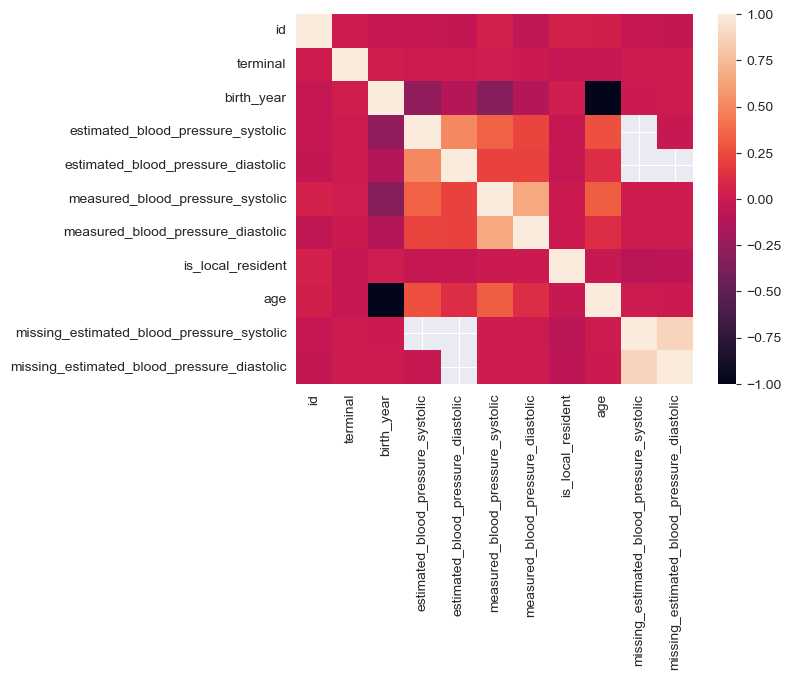

In [147]:
# Evaluate multicoliniarity between the variables:
import seaborn as sns
import matplotlib.pyplot as plt

corr = data_df.corr()
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.show()

From the plot above, we can see that the variables "Estimated Blood Pressure Systolic" and "Estimated Blood Pressure Diastolic" are highly correlated.

In [148]:
# remove null values
data_df = data_df.dropna()
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14831 entries, 0 to 16384
Data columns (total 23 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0   id                                          14831 non-null  int64         
 1   time                                        14831 non-null  datetime64[ns]
 2   terminal                                    14831 non-null  int64         
 3   postal_code                                 14831 non-null  object        
 4   municipality                                14831 non-null  object        
 5   district                                    14831 non-null  object        
 6   federal_state                               14831 non-null  object        
 7   condition                                   14831 non-null  object        
 8   birth_year                                  14831 non-null  Int64         
 9   gender

/var/folders/kl/77dw97d55y1_kplchw9htctc0000gn/T/ipykernel_66400/2866049580.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_df['measured_blood_pressure_diastolic'])


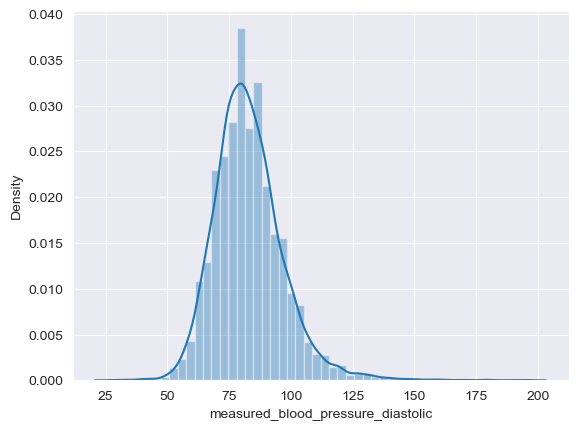

In [149]:
# Check the distribution of the meaesured blood pressure diastolic:
sns.distplot(data_df['measured_blood_pressure_diastolic'])
plt.show()

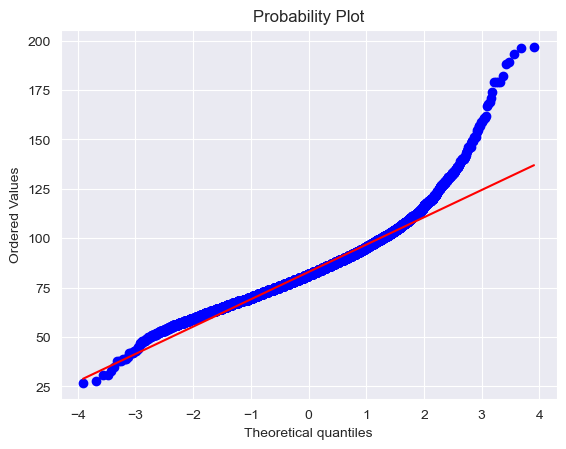

In [150]:
# Check normality of the measured blood pressure diastolic:
from scipy import stats
stats.probplot(data_df['measured_blood_pressure_diastolic'], plot=plt)
plt.show()

The distribution of the measured blood pressure diastolic is not normal. Therefore, we will use the Spearman correlation coefficient to evaluate the correlation between the variables.

In [151]:
# Evaluate the correlation between the variables:
from scipy.stats import spearmanr
corr, _ = spearmanr(data_df['measured_blood_pressure_systolic'], data_df['measured_blood_pressure_diastolic'])
print('Spearmans correlation: %.3f' % corr)

Spearmans correlation: 0.651


From the result above, we can see that the variables "Measured Blood Pressure Systolic" and "Measured Blood Pressure Diastolic" are highly correlated.

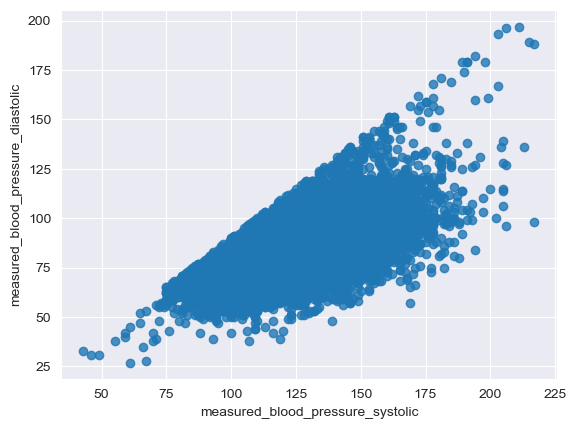

In [152]:
# Evaluate the quadratic nature of the measured blood pressure diastolic:
sns.regplot(x=data_df['measured_blood_pressure_systolic'], y=data_df['measured_blood_pressure_diastolic'], fit_reg=False)
plt.show()

In [153]:
# transform the measured blood pressure diastolic so that it can be normally distributed:
import numpy as np
data_df['measured_blood_pressure_diastolic'] = np.sqrt(data_df['measured_blood_pressure_diastolic'])

/var/folders/kl/77dw97d55y1_kplchw9htctc0000gn/T/ipykernel_66400/999309492.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_df['measured_blood_pressure_diastolic'])


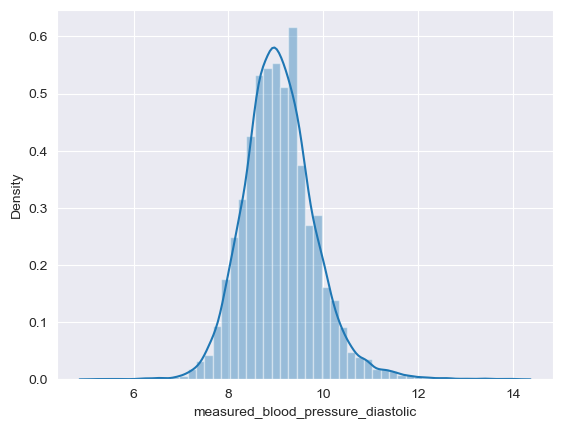

In [154]:
# visualize the distribution of the measured blood pressure diastolic after the transformation:
sns.distplot(data_df['measured_blood_pressure_diastolic'])
plt.show()

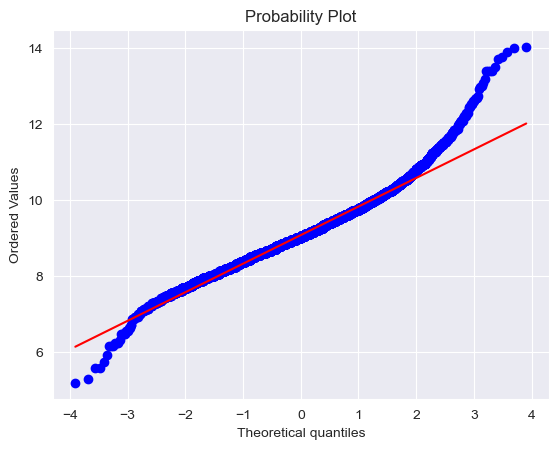

In [155]:
# visualize the normality of the measured blood pressure diastolic after the transformation:
from scipy import stats
stats.probplot(data_df['measured_blood_pressure_diastolic'], plot=plt)
plt.show()

In [156]:
# regress back to the original measured blood pressure diastolic:
data_df['measured_blood_pressure_diastolic'] = data_df['measured_blood_pressure_diastolic']**2
# Apply log transformation on the measured blood pressure diastolic:
data_df['measured_blood_pressure_diastolic'] = np.log(data_df['measured_blood_pressure_diastolic'])

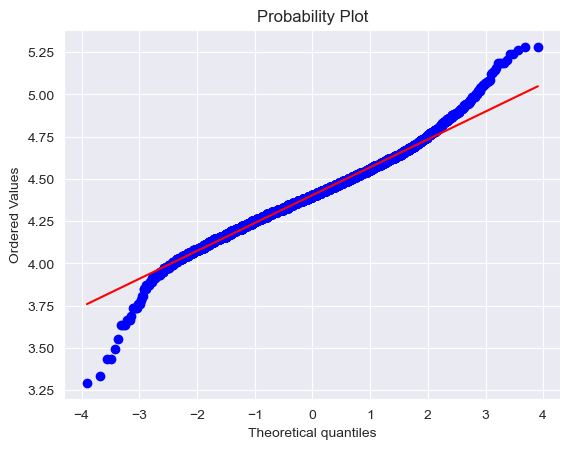

In [157]:
# visualize the qq plot of the measured blood pressure diastolic after the log transformation:
from scipy import stats
stats.probplot(data_df['measured_blood_pressure_diastolic'], plot=plt)
plt.show()

From the plot above we can see that the log transformation of the measured blood pressure diastolic approaches a normal distribution.

In [158]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14831 entries, 0 to 16384
Data columns (total 23 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0   id                                          14831 non-null  int64         
 1   time                                        14831 non-null  datetime64[ns]
 2   terminal                                    14831 non-null  int64         
 3   postal_code                                 14831 non-null  object        
 4   municipality                                14831 non-null  object        
 5   district                                    14831 non-null  object        
 6   federal_state                               14831 non-null  object        
 7   condition                                   14831 non-null  object        
 8   birth_year                                  14831 non-null  Int64         
 9   gender

In [196]:
# transform age type from Int64 to int64:
data_df['age'] = data_df['age'].astype('int64')
data_df['birth_year'] = data_df['birth_year'].astype('int64')
data_df['condition'] = data_df['condition'].astype('int64')

# transform bool variables to int64:
data_df['is_local_resident'] = data_df['is_local_resident'].astype('int64')
data_df['known_blood_sugar'] = data_df['known_blood_sugar'].astype('int64')
data_df['known_cholesterol'] = data_df['known_cholesterol'].astype('int64')
data_df['in_treatment'] = data_df['in_treatment'].astype('int64')

data_df.head()

,id,time,terminal,postal_code,municipality,district,federal_state,condition,birth_year,gender,...,in_treatment,estimated_blood_pressure_systolic,estimated_blood_pressure_diastolic,measured_blood_pressure_systolic,measured_blood_pressure_diastolic,is_local_resident,age,age_group,missing_estimated_blood_pressure_systolic,missing_estimated_blood_pressure_diastolic
0,11519,2006-04-27 10:49:12,2,8054.0,Seiersberg,Graz-Umgebung,Steiermark,1,1967,m,...,0,142.0,89.0,179,4.709530,1,39,adult,False,False
1,11520,2006-04-27 11:10:46,2,8403.0,Lebring-Sankt Margarethen,Leibnitz,Steiermark,1,1968,m,...,0,140.0,70.0,109,4.382027,1,38,adult,False,False
2,11521,2006-04-27 11:21:09,2,8020.0,Graz - Gries,Graz(Stadt),Steiermark,1,1973,m,...,0,130.0,75.0,128,4.682131,1,33,adult,False,False
3,11522,2006-04-27 11:32:59,1,8044.0,Graz - Mariatrost,Graz(Stadt),Steiermark,1,1961,m,...,0,100.0,80.0,130,4.499810,1,45,adult,False,False
4,11524,2006-04-27 12:01:48,2,8010.0,Graz - Geidorf,Graz(Stadt),Steiermark,2,1978,f,...,0,140.0,70.0,144,4.634729,1,28,adult,False,False


In [203]:
# how many unique values are there in the municipality column?:
data_df['municipality'].nunique()

984

In [205]:
# fit a linear regression model to the measured blood pressure diastolic:
import statsmodels.formula.api as smf

# select all features except the target variable:
features = data_df.drop(['measured_blood_pressure_diastolic',
                         'time',
                         'id',
                         'missing_estimated_blood_pressure_systolic',
                         'missing_estimated_blood_pressure_diastolic',
                         'postal_code',
                         'municipality'
                         ], axis=1)

# extract the categorical variables:
categorical_variables = features.select_dtypes(include=['object']).columns



# dummy code the categorical variables:
features = pd.get_dummies(features, columns=categorical_variables, drop_first=True)

model = smf.ols('measured_blood_pressure_diastolic ~ features', data=data_df).fit()

In [206]:
# print the model summary:
print(model.summary())

                                    OLS Regression Results                                   
Dep. Variable:     measured_blood_pressure_diastolic   R-squared:                       0.478
Model:                                           OLS   Adj. R-squared:                  0.474
Method:                                Least Squares   F-statistic:                     120.3
Date:                               Sat, 29 Apr 2023   Prob (F-statistic):               0.00
Time:                                       22:39:37   Log-Likelihood:                 10420.
No. Observations:                              14831   AIC:                        -2.061e+04
Df Residuals:                                  14718   BIC:                        -1.976e+04
Df Model:                                        112                                         
Covariance Type:                           nonrobust                                         
                    coef    std err          t      P>|t|   

<Axes: xlabel='measured_blood_pressure_diastolic'>

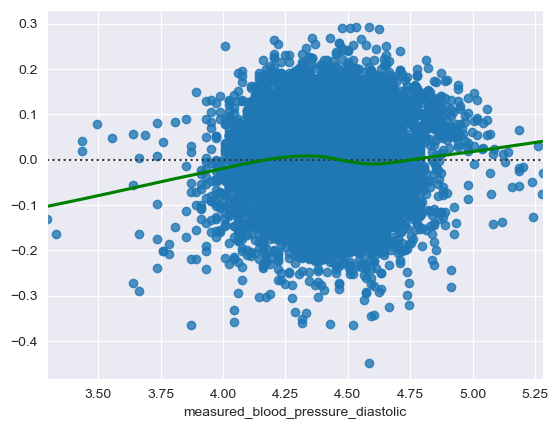

In [210]:
# residual plot for the measured blood pressure diastolic with lowess smoother:
sns.residplot(x=data_df['measured_blood_pressure_diastolic'], y=model.resid, lowess=True, line_kws=dict(color="g"))

From the residual plot above, we can see that the residuals are not randomly distributed around zero. This indicates that the linear regression model is not a good fit for the data. The lowess smoother also indicates that the residuals are not randomly distributed around zero.

In [211]:
# Based on the model above extract the confidence intervals for the coefficients:
model.conf_int()

,0,1
Intercept,0.000001,0.000002
features[0],-0.005702,-0.000974
features[1],-0.006022,-0.000636
features[2],0.001743,0.001772
features[3],-0.009799,0.001231
...,...,...
features[118],-0.009520,0.007417
features[119],0.004317,0.012376
features[120],-0.002629,0.008198
features[121],0.056833,0.072627


In [212]:
# Based on the model above extract the p-values for the coefficients:
model.pvalues

Intercept        6.483551e-225
features[0]       5.648981e-03
features[1]       1.538684e-02
features[2]       0.000000e+00
features[3]       1.279184e-01
                     ...      
features[118]     8.077046e-01
features[119]     4.921248e-05
features[120]     3.133493e-01
features[121]     1.342188e-57
features[122]     1.146329e-04
Length: 124, dtype: float64

In [213]:
# Based on the model above extract the variables that are statistically significant:
model.pvalues[model.pvalues < 0.05]


Intercept        6.483551e-225
features[0]       5.648981e-03
features[1]       1.538684e-02
features[2]       0.000000e+00
features[5]       1.368724e-06
features[7]       4.010786e-38
features[8]       0.000000e+00
features[10]      1.170142e-40
features[16]      2.187709e-02
features[21]      1.394648e-02
features[25]      4.140949e-02
features[41]      8.818974e-03
features[46]      3.724397e-02
features[69]      4.574263e-02
features[80]      4.489840e-02
features[82]      4.407813e-05
features[119]     4.921248e-05
features[121]     1.342188e-57
features[122]     1.146329e-04
dtype: float64